In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\PerformanceAnalysis\sidewalk_bikeway_trails'

In [3]:
bikeways = gpd.read_file(os.path.join(path, "bikeways.shp"))

In [4]:
bikeways.head()

,id,name,type,status,source,geometry
0,1811.0,None,Bike Lane,Built,LCOG,"LINESTRING (-13705805.396 5477828.642, -137058..."
1,1922.0,None,Bike Lane,Built,EUG,"LINESTRING (-13710446.573 5474013.658, -137104..."
2,334.0,MLK Conn,Shared Use Path,Built,LCOG,"LINESTRING (-13701510.497 5474278.039, -137015..."
3,1386.0,Amazon West Side Path,Shared Use Path,Built,LCOG,"LINESTRING (-13701521.145 5469198.971, -137014..."
4,1088.0,Division Ave Conn Path,Shared Use Path,Built,EUG,"LINESTRING (-13705017.230 5480591.833, -137050..."


In [5]:
bikeways.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
import numpy as np

In [7]:
bikeways['id'] = list(range(1,  bikeways.shape[0]+1, 1))

In [8]:
bikeways['mode'] = np.repeat('bikeway', bikeways.shape[0])

In [9]:
sidewalks = gpd.read_file(os.path.join(path, "Sidewalks_EUG_SPR.shp")) 

In [10]:
sidewalks.head()

,OBJECTID,Length,geometry
0,1,151,"LINESTRING Z (4226331.689 893353.069 0.000, 42..."
1,2,53,"LINESTRING Z (4226455.939 893192.738 0.000, 42..."
2,3,52,"LINESTRING Z (4226404.210 893194.363 0.000, 42..."
3,4,52,"LINESTRING Z (4226352.186 893197.835 0.000, 42..."
4,5,52,"LINESTRING Z (4226252.842 893218.949 0.000, 42..."


In [11]:
sidewalks.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
sidewalks['mode'] = np.repeat('sidewalk', sidewalks.shape[0])

In [13]:
sidewalks['id'] = list(range(bikeways.shape[0]+1,  bikeways.shape[0]+sidewalks.shape[0]+1, 1))

In [14]:
from shapely.geometry.collection import GeometryCollection

In [15]:
sidewalks['geometry'] = sidewalks.geometry.apply(lambda x: x if x else GeometryCollection())

In [16]:
sidewalks = sidewalks.to_crs(epsg=3857)

In [17]:
trails = gpd.read_file(os.path.join(path, "Trails_EUG_SPR.shp")) 

In [18]:
trails.head()

,OBJECTID,PARK_NAME,TRAIL_SURF,SECTION_NA,TRAIL_NAME,geometry
0,1,<Null>,Asphalt,Spring Blvd,Ridgeline Trail,"MULTILINESTRING ((4247634.460 861640.316, 4247..."
1,6,Spencer Butte,Gravel,Spencer Butte,Spencer Butte,"LINESTRING (4240795.590 856292.228, 4240827.69..."
2,65,Ribbon Trail,Gravel,Ribbon Trail,Ridgeline Trail,"LINESTRING (4247856.942 870159.331, 4247877.08..."
3,117,Skinner Butte,Gravel,Skinners Butte,Skinners Butte,"LINESTRING (4239107.445 882980.773, 4239112.14..."
4,118,Wild Iris Ridge,Gravel,Wild Iris Ridge,Wild Iris Ridge,"LINESTRING (4221964.439 870526.077, 4221963.62..."


In [19]:
trails['mode'] = np.repeat('trail', trails.shape[0])

In [20]:
trails['id'] = list(range(bikeways.shape[0]+sidewalks.shape[0]+1, 
                          bikeways.shape[0]+sidewalks.shape[0]+trails.shape[0]+1, 1))

In [21]:
trails.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
trails['geometry'] = trails.geometry.apply(lambda x: x if x else GeometryCollection())

In [23]:
trails = trails.to_crs(epsg=3857)

In [24]:
bikeways[['id', 'mode', 'geometry']]

,id,mode,geometry
0,1,bikeway,"LINESTRING (-13705805.396 5477828.642, -137058..."
1,2,bikeway,"LINESTRING (-13710446.573 5474013.658, -137104..."
2,3,bikeway,"LINESTRING (-13701510.497 5474278.039, -137015..."
3,4,bikeway,"LINESTRING (-13701521.145 5469198.971, -137014..."
4,5,bikeway,"LINESTRING (-13705017.230 5480591.833, -137050..."
...,...,...,...
3101,3102,bikeway,"LINESTRING (-13702276.832 5472496.615, -137021..."
3102,3103,bikeway,"LINESTRING (-13703131.642 5472496.925, -137029..."
3103,3104,bikeway,"LINESTRING (-13702622.503 5472498.595, -137026..."
3104,3105,bikeway,"LINESTRING (-13702969.315 5472494.681, -137029..."


In [25]:
facilities = bikeways[['id', 'mode', 'geometry']].append(sidewalks[['id', 'mode', 'geometry']])

In [26]:
facilities = facilities.append(trails[['id', 'mode', 'geometry']])

In [27]:
facilities.tail()

,id,mode,geometry
325,55706,trail,"LINESTRING (-13695933.653 5473134.252, -136954..."
326,55707,trail,"LINESTRING (-13695474.796 5473134.887, -136954..."
327,55708,trail,"LINESTRING (-13695270.245 5472605.356, -136952..."
328,55709,trail,"LINESTRING (-13694912.546 5472508.818, -136949..."
329,55710,trail,"LINESTRING (-13694912.524 5472508.081, -136947..."


In [28]:
type(facilities)

geopandas.geodataframe.GeoDataFrame

In [29]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [30]:
facilities.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
facilities.to_file(os.path.join(path, "facilities.shp"))

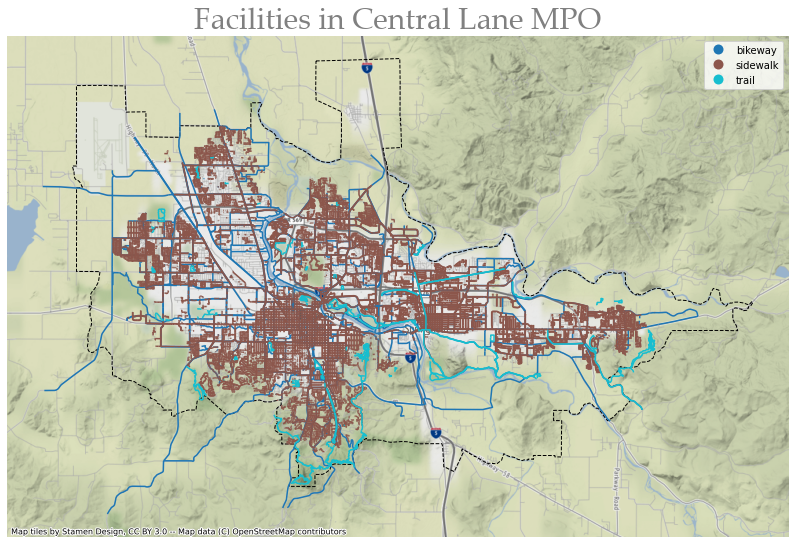

In [33]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities.plot(ax=ax, column='mode', cmap='tab10', legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Facilities in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

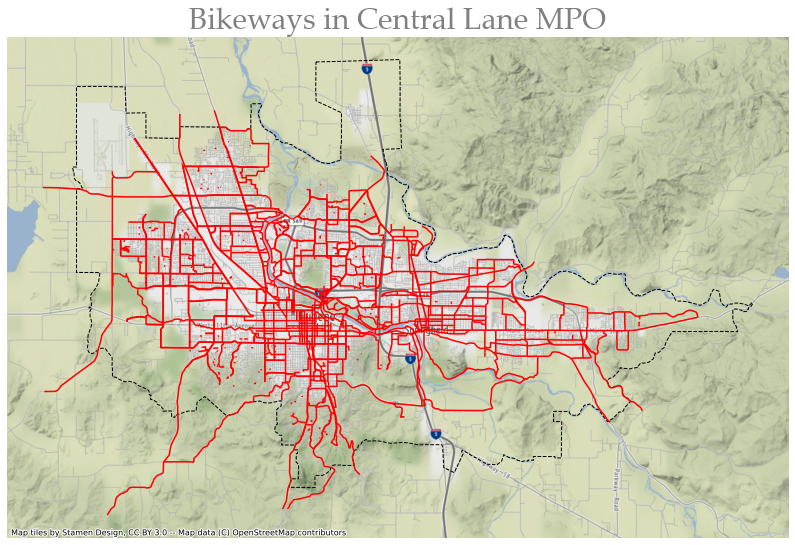

In [34]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities[facilities['mode']=='bikeway'].plot(ax=ax, color = 'red', legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Bikeways in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

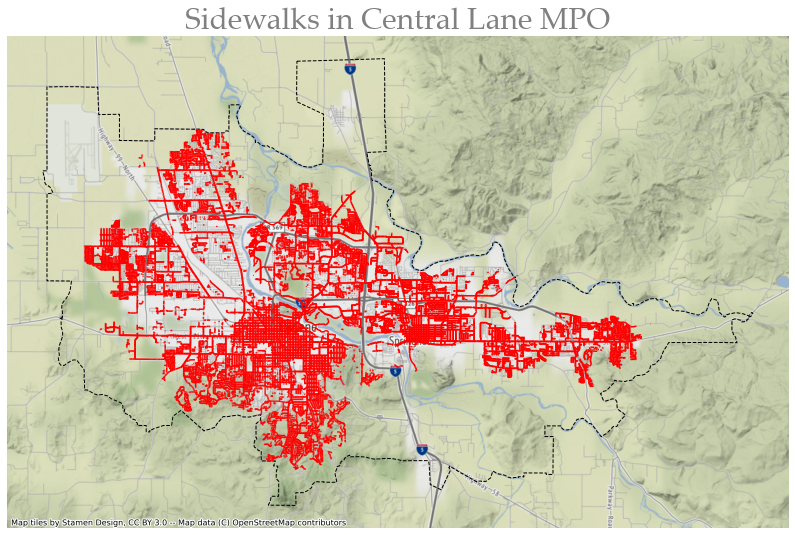

In [35]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities[facilities['mode']=='sidewalk'].plot(ax=ax, color = 'red', legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Sidewalks in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

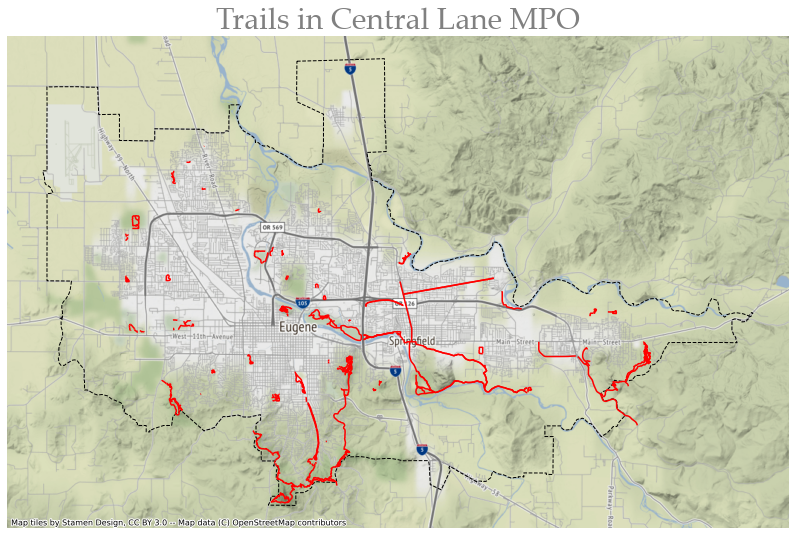

In [36]:
fig, ax = plt.subplots(figsize=(14, 12))
facilities[facilities['mode']=='trail'].plot(ax=ax, color = 'red', legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Trails in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");